In [1]:
#input data
import pandas as pd

df = pd.io.parsers.read_csv('https://raw.githubusercontent.com/rasbt/pattern_classification/master/data/wine_data.csv',
                           usecols = [0, 1, 2], header = None)
df.columns=['Class label', 'Alcohol', 'Malic acid']
df.head()

Class label  Alcohol  Malic acid
0            1    14.23        1.71
1            1    13.20        1.78
2            1    13.16        2.36
3            1    14.37        1.95
4            1    13.24        2.59

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(df, test_size = 0.3)

> ### Int 

In [3]:
#Standard transform
from sklearn.preprocessing import StandardScaler

std = StandardScaler().fit(X_train[['Alcohol', 'Malic acid']])
X_train_std = std.transform(X_train[['Alcohol', 'Malic acid']])
X_test_std = std.transform(X_test[['Alcohol', 'Malic acid']])

In [4]:
#Normalizer transform
from sklearn.preprocessing import Normalizer

nml = Normalizer().fit(X_train[['Alcohol', 'Malic acid']])
X_train_nml = nml.transform(X_train[['Alcohol', 'Malic acid']])
X_test_nml = nml.transform(X_test[['Alcohol', 'Malic acid']])

In [5]:
%matplotlib inline

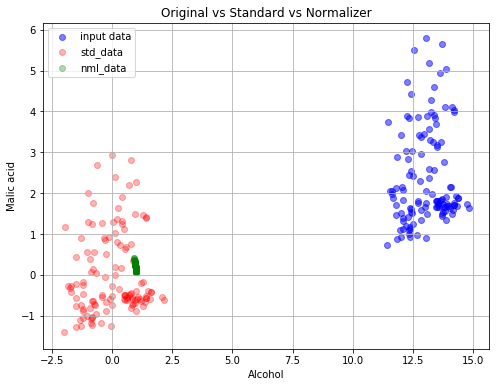

In [6]:
#plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(X_train['Alcohol'], X_train['Malic acid'], color = 'blue',
           label = 'input data', alpha = 0.5)
plt.scatter(X_train_std[:, 0], X_train_std[:, 1], color = 'red',
           label = 'std_data', alpha = 0.3)
plt.scatter(X_train_nml[:, 0], X_train_nml[:, 1], color = 'green',
           label = 'nml_data', alpha = 0.3)
plt.legend()
plt.xlabel('Alcohol')
plt.ylabel('Malic acid')
plt.title('Original vs Standard vs Normalizer')
plt.grid()

>### List or Dir 

In [7]:
# load data from json file
df1 = pd.read_json('all_lobsters.json')

In [8]:
# create a function to view data
def view_data(data_frame, iloc):
    columns_name = data_frame.columns
    print(data_frame.dtypes)
    print('=' * 10)
    for name in columns_name:
        print(name)
        print('-' * 5)
        print(data_frame[name][iloc])
        print('=' * 10)

In [9]:
view_data(df1, 5)
# look at data, we can identify some works to do
#    - expanding data at columns: submitter_user and tags
#    - convert date type at: created_at and last_updated

comment_count              int64
comments_url              object
created_at        datetime64[ns]
description               object
downvotes                  int64
last_updated              object
score                      int64
short_id_url              object
submitter_user            object
tags                      object
title                     object
upvotes                    int64
url                       object
dtype: object
comment_count
-----
1
comments_url
-----
https://lobste.rs/s/2kiouh/result_objects_errors_without
created_at
-----
2017-04-30 17:14:54
description
-----

downvotes
-----
0
last_updated
-----
2017-05-01T06:29:11.725518
score
-----
6
short_id_url
-----
https://lobste.rs/s/2kiouh
submitter_user
-----
{'username': 'pushcx', 'is_moderator': False, 'karma': 29313, 'is_admin': False, 'avatar_url': 'https://secure.gravatar.com/avatar/e7be134a6de3d308adf765be1004c450?r=pg&d=identicon&s=100', 'created_at': '2012-08-14T20:25:08.000-05:00', 'about': "Hi, I'm Pete

In [10]:
#if data in dic
def expanding_column(data_frame, column_name):
    new_df = data_frame[column_name].apply(pd.Series)
    inter_selection = set(data_frame.columns).intersection(new_df.columns)
    for name in inter_selection:
        new_df = new_df.rename(columns = {name : '.'.join((column_name, name))})
    data_frame = pd.concat([data_frame.drop([column_name],axis =1),
                          new_df], axis = 1)
    return data_frame

In [11]:
# if data in list
def expanding_list(data_frame, column_name):
    new_df = data_frame[column_name].apply(pd.Series)
    list_tags = pd.unique(new_df.values.ravel())
    new_df = pd.get_dummies(new_df.apply(pd.Series).stack()).sum(level = 0)
    data_frame = pd.concat([data_frame.drop([column_name],axis =1),
                      new_df], axis = 1)
    return data_frame

*read more about df.stack*

In [12]:
df2 = expanding_list(expanding_column(df1, 'submitter_user'), 'tags')

In [13]:
# find corr
import numpy as np

def find_big_corr(data_frame, score):
    '''If corr value is greater than score we will presume big_corr'''
    list_corr = []
    for key in data_frame.dtypes.keys():
        if data_frame.dtypes.get(key) == 'int64'\
        or data_frame.dtypes.get(key) == 'uint8':
            list_corr.append(key)

    df_corr = np.abs(data_frame[list_corr].corr())
    dic_corr = {}

    for i in range(len(list_corr)):
        key = df_corr.iloc[i].keys()[i]
        dic_corr[key] = []
        for name in df_corr.iloc[i].keys():
            if df_corr.iloc[i].get(name) > score:
                if df_corr.iloc[i].get(name) != 1:
                    dic_corr[key].append(name)
    final = {k: v for k, v in dic_corr.items() if bool(v)}
    return final

find_big_corr(df2, 0.7)

{'audio': ['javascript'],
 'browsers': ['networking'],
 'compilers': ['haskell'],
 'debugging': ['java'],
 'haskell': ['compilers'],
 'java': ['debugging'],
 'javascript': ['audio', 'rust'],
 'math': ['release'],
 'networking': ['browsers'],
 'release': ['math'],
 'rust': ['javascript'],
 'score': ['upvotes'],
 'upvotes': ['score']}

In [14]:
#let try it
df2['math'].corr(df2['release'])

0.81080663996257873

> ### Category 

In [15]:
df3 = pd.read_csv('adult.csv', na_values=['#NAME?'])
df3.income.value_counts()
df3['income'] = [0 if x == '<=50K' else 1 for  x in df3['income']]
df3_X = df3.drop('income', 1)
df3_y = df3.income

In [16]:
cat_columns = []
for column in df3_X.columns:
    if df3_X[column].dtypes == 'object':
        unique_X = set(df3_X[column])
        max_fre = df3_X[column].value_counts().max()
        max_vs_total = max_fre / df3_X[column].count()
        print('feature "{}" have {} class is: {}(max_vs_total is: {})'\
              .format(column, len(unique_X), unique_X, max_vs_total))
        print('=' * 10)
        cat_columns.append(column)
# in feature "native_country", we have 40 cats but percent of biggest class is 89% so we need convert it to decrease
# number of cats.

feature "workclass" have 8 class is: {'?', 'Local-gov', 'Federal-gov', 'Private', 'Self-emp-inc', 'Without-pay', 'State-gov', 'Self-emp-not-inc'}(max_vs_total is: 0.687)
feature "education" have 17 class is: {'?', 'HS-grad', 'Doctorate', 'Prof-school', 'Assoc-acdm', 'Masters', '5th-6th', '10th', 'Preschool', '1st-4th', '12th', 'Some-college', '11th', '9th', '7th-8th', 'Assoc-voc', 'Bachelors'}(max_vs_total is: 0.3194)
feature "marital_status" have 7 class is: {'Separated', 'Never-married', 'Divorced', 'Married-AF-spouse', 'Widowed', 'Married-civ-spouse', 'Married-spouse-absent'}(max_vs_total is: 0.454)
feature "occupation" have 15 class is: {'Armed-Forces', 'Handlers-cleaners', 'Prof-specialty', '?', 'Exec-managerial', 'Adm-clerical', 'Machine-op-inspct', 'Protective-serv', 'Priv-house-serv', 'Tech-support', 'Farming-fishing', 'Other-service', 'Sales', 'Craft-repair', 'Transport-moving'}(max_vs_total is: 0.125)
feature "relationship" have 6 class is: {'Other-relative', 'Not-in-family',

In [17]:
df3_X['native_country'].value_counts()

United-States                 4465
Mexico                         104
?                               97
Canada                          28
Germany                         22
Philippines                     22
Puerto-Rico                     16
El-Salvador                     16
England                         16
Jamaica                         15
China                           15
Cuba                            14
Dominican-Republic              13
Italy                           12
India                           12
Iran                            11
Taiwan                          10
Guatemala                       10
Vietnam                         10
Japan                            9
South                            9
Poland                           9
Portugal                         7
Greece                           6
Haiti                            6
Nicaragua                        5
Columbia                         5
Ireland                          4
Trinadad&Tobago     

In [18]:
df3_X['native_country'] = ['US' if x == 'United-States' else 'others' for x in df3_X['native_country']]

In [19]:
# build a function to dummy all the categorical variables
def dummy_cat_var(df, dummy_list):
    for feature in dummy_list:
        df_dummy = pd.get_dummies(df[feature], prefix = feature)
        df = df.drop(feature, 1)
        df = pd.concat([df, df_dummy], axis = 1)
    return df

In [20]:
df3_X = dummy_cat_var(df3_X, cat_columns)
#Note:enumerate function to make class_label
#Beside this way, we have some method to deal with category feature
#Using df.map()
#Using LabelEncoder or OneHotEncoder in sklearn

>### Missing data

In [21]:
df3_X.isnull().sum().sort_values(ascending=False).head()

fnlwgt                 107
education_num           57
age                     48
education_Doctorate      0
education_7th-8th        0
dtype: int64

In [22]:
from sklearn.preprocessing import Imputer

imp = Imputer(strategy = 'mean')
imp.fit(df3_X)
df3_X = pd.DataFrame(data = imp.transform(df3_X), columns = df3_X.columns)
# beside we can use drop NA to drops obs cotain NAN.
#df.temperature = df.groupby('username').temperature.fillna(
#   method='backfill', limit=3)

In [23]:
df3_X.isnull().sum().sort_values(ascending=False).head()

native_country_others    0
education_Bachelors      0
education_5th-6th        0
education_7th-8th        0
education_9th            0
dtype: int64

> ### Outlier

In [24]:
#turkey outlier
def find_outlier_turkey(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3 - q1
    floor = q1 - 1.5 * iqr
    celling = q3 + 1.5 * iqr
    outlier_indices = list(x.index[(x < floor) | (x > celling)])
    outlier_values = list(x[outlier_indices])
    return outlier_indices, outlier_values

In [25]:
turkey_indices, turkey_values = find_outlier_turkey(df3_X['age'])
print(np.sort(turkey_values))

[ 76.  76.  76.  76.  76.  76.  76.  76.  76.  77.  77.  77.  77.  77.  78.
  78.  79.  79.  79.  80.  80.  80.  81.  81.  81.  81.  82.  88.  90.  90.
  90.  90.  90.  90.  90.]


In [26]:
#kde outlier
from sklearn.preprocessing import scale
from statsmodels.nonparametric.kde import KDEUnivariate

X_scaled = scale(list(map(float, df3_X['age'])))
kde = KDEUnivariate(X_scaled)
kde.fit(bw="scott", fft=True)
pred = kde.evaluate(X_scaled)
n = sum(pred < 0.02)
outlier_ind = np.asarray(pred).argsort()[:n]
outlier_value = np.asarray(df3_X['age'])[outlier_ind]
np.sort(outlier_value)
#argsort will return indices after sorted

array([ 76.,  76.,  76.,  76.,  76.,  76.,  76.,  76.,  76.,  77.,  77.,
        77.,  77.,  77.,  78.,  78.,  79.,  79.,  79.,  80.,  80.,  80.,
        81.,  81.,  81.,  81.,  82.,  88.,  90.,  90.,  90.,  90.,  90.,
        90.,  90.])

>### Feature engineer 

In [45]:
###iteractions among features
from sklearn.preprocessing import PolynomialFeatures
from itertools import combinations

def add_interactions(df):
    # Get feature names
    combos = list(combinations(list(df.columns), 2))
    colnames = list(df.columns) + ['_'.join(x) for x in combos]
    
    # Find interactions
    poly = PolynomialFeatures(interaction_only=True, include_bias=False)
    df = poly.fit_transform(df)
    df = pd.DataFrame(df)
    df.columns = colnames
    
    # Remove interaction terms with all 0 values            
    noint_indicies = [i for i, x in enumerate(list((df == 0).all())) if x]
    df = df.drop(df.columns[noint_indicies], axis=1)
    
    return df

df3_X_inter = add_interactions(df3_X)
print('shape of df3_X: {}'.format(np.shape(df3_X)))
print('shape of df3_X after interactived: {}'.format(np.shape(df3_X_inter)))

shape of df3_X: (5000, 68)
shape of df3_X after interactived: (5000, 1737)


In [46]:
df3_X_inter.head()

age    fnlwgt  education_num  capital_gain  capital_loss  hours_per_week  \
0  39.0   77516.0           13.0        2174.0           0.0            40.0   
1  50.0   83311.0           13.0           0.0           0.0            13.0   
2  38.0  215646.0            9.0           0.0           0.0            40.0   
3  53.0  234721.0            7.0           0.0           0.0            40.0   
4  28.0  338409.0           13.0           0.0           0.0            40.0   

   workclass_?  workclass_Federal-gov  workclass_Local-gov  workclass_Private  \
0          0.0                    0.0                  0.0                0.0   
1          0.0                    0.0                  0.0                0.0   
2          0.0                    0.0                  0.0                1.0   
3          0.0                    0.0                  0.0                1.0   
4          0.0                    0.0                  0.0                1.0   

                ...                race_Other_native_country_US  \
0               ...                                         0.0   
1               ...                                         0.0   
2               ...                                         0.0   
3               ...                                         0.0   
4               ...                                         0.0   

   race_Other_native_country_others  race_White_sex_Female  \
0                               0.0                    0.0   
1                               0.0                    0.0   
2                               0.0                    0.0   
3                               0.0                    0.0   
4                               0.0                    0.0   

   race_White_sex_Male  race_White_native_country_US  \
0                  1.0                           1.0   
1                  1.0                           1.0   
2                  1.0                           1.0   
3                  0.0                           0.0   
4                  0.0                           0.0   

   race_White_native_country_others  sex_Female_native_country_US  \
0                               0.0                           0.0   
1                               0.0                           0.0   
2                               0.0                           0.0   
3                               0.0                           0.0   
4                               0.0                           0.0   

   sex_Female_native_country_others  sex_Male_native_country_US  \
0                               0.0                         1.0   
1                               0.0                         1.0   
2                               0.0                         1.0   
3                               0.0                         0.0   
4                               1.0                         0.0   

   sex_Male_native_country_others  
0                             0.0  
1                             0.0  
2                             0.0  
3                             0.0  
4                             0.0  

[5 rows x 1737 columns]

In [47]:
###Dimensionality reduction using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
df3_X_pca = pd.DataFrame(pca.fit_transform(df3_X))

In [48]:
df3_X_pca.head()

0            1          2          3          4         5  \
0 -113459.191512  1137.639670 -93.338782  -0.783130  -0.323572 -2.870405   
1 -107664.135952 -1036.209912 -97.534955   6.739546 -28.322618 -3.873604   
2   24670.864089 -1032.824410 -95.312043  -0.043975  -0.165284  1.000684   
3   43745.863928 -1032.334880 -94.969332  15.003630  -2.353826  2.912199   
4  147433.864123 -1029.686384 -93.302934  -8.664729   1.274523 -3.304552   

          6         7         8         9  
0  0.442205  1.099425  0.095188 -0.350178  
1 -1.449076  0.081798  0.304278 -0.313051  
2  0.342129  0.462325 -0.890424 -0.428937  
3 -0.288711 -0.449719  0.068134  0.461912  
4  0.256331 -1.345653  0.156481  0.438931


- Use cases for modeling:
    - One of the most common dimensionality reduction techniques
    - Use if there are too many features or if observation/feature ratio is poor
    - Also, potentially good option if there are a lot of highly correlated variables in your dataset

>### Feature selection (filter | wrapper)

In [50]:
df3_X_train, df3_X_test, df3_y_train, df3_y_test = train_test_split(df3_X_inter, df3_y,
                                                                    train_size = 0.7, random_state = 1)

/home/mmr/.local/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [52]:
print(np.shape(df3_X),np.shape(df3_X_inter), np.shape(df3_X_train), np.shape(df3_X_test))

(5000, 68) (5000, 1737) (3500, 1737) (1500, 1737)


In [53]:
import sklearn.feature_selection
import sklearn.feature_extraction

In [59]:
selected = sklearn.feature_selection.SelectKBest(k = 20).fit(df3_X_train, df3_y_train)
indices_selected = selected.get_support(indices = True)
columns_selected = [df3_X_train.columns[i] for i in indices_selected]
columns_selected

/home/mmr/.local/lib/python3.5/site-packages/sklearn/feature_selection/univariate_selection.py:113: UserWarning: Features [ 350  361  367  458  482  494  535  538  552  625  626  654  663  673  718
  750  753  782  812  815  835  857  866  875  879  893  903  985  998 1001
 1004 1012 1014 1071 1074 1118 1128 1209 1210 1212 1248 1263 1311 1313 1314
 1316 1318 1329 1353 1362 1370 1408 1444 1526 1527 1542 1581 1609 1612 1704] are constant.
  UserWarning)
/home/mmr/.local/lib/python3.5/site-packages/sklearn/feature_selection/univariate_selection.py:114: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


['marital_status_Married-civ-spouse',
 'marital_status_Never-married',
 'relationship_Husband',
 'age_education_num',
 'age_hours_per_week',
 'age_marital_status_Married-civ-spouse',
 'age_relationship_Husband',
 'fnlwgt_marital_status_Married-civ-spouse',
 'education_num_hours_per_week',
 'education_num_marital_status_Married-civ-spouse',
 'education_num_relationship_Husband',
 'hours_per_week_marital_status_Married-civ-spouse',
 'hours_per_week_relationship_Husband',
 'marital_status_Married-civ-spouse_relationship_Husband',
 'marital_status_Married-civ-spouse_race_White',
 'marital_status_Married-civ-spouse_sex_Male',
 'marital_status_Married-civ-spouse_native_country_US',
 'relationship_Husband_race_White',
 'relationship_Husband_sex_Male',
 'relationship_Husband_native_country_US']

In [61]:
df3_X_train = df3_X_train[columns_selected]
df3_X_test = df3_X_test[columns_selected]
df3_X_train.head()

marital_status_Married-civ-spouse  marital_status_Never-married  \
1334                                1.0                           0.0   
4768                                1.0                           0.0   
65                                  1.0                           0.0   
177                                 0.0                           1.0   
4489                                0.0                           0.0   

      relationship_Husband  age_education_num  age_hours_per_week  \
1334                   1.0              561.0              2040.0   
4768                   1.0              560.0              1600.0   
65                     1.0              324.0              1440.0   
177                    0.0              306.0              1360.0   
4489                   0.0              336.0              1120.0   

      age_marital_status_Married-civ-spouse  age_relationship_Husband  \
1334                                   51.0                      51.0   
4768                                   40.0                      40.0   
65                                     36.0                      36.0   
177                                     0.0                       0.0   
4489                                    0.0                       0.0   

      fnlwgt_marital_status_Married-civ-spouse  education_num_hours_per_week  \
1334                                  146767.0                         440.0   
4768                                  298635.0                         560.0   
65                                    155537.0                         360.0   
177                                        0.0                         360.0   
4489                                       0.0                         480.0   

      education_num_marital_status_Married-civ-spouse  \
1334                                             11.0   
4768                                             14.0   
65                                                9.0   
177                                               0.0   
4489                                              0.0   

      education_num_relationship_Husband  \
1334                                11.0   
4768                                14.0   
65                                   9.0   
177                                  0.0   
4489                                 0.0   

      hours_per_week_marital_status_Married-civ-spouse  \
1334                                              40.0   
4768                                              40.0   
65                                                40.0   
177                                                0.0   
4489                                               0.0   

      hours_per_week_relationship_Husband  \
1334                                 40.0   
4768                                 40.0   
65                                   40.0   
177                                   0.0   
4489                                  0.0   

      marital_status_Married-civ-spouse_relationship_Husband  \
1334                                                1.0        
4768                                                1.0        
65                                                  1.0        
177                                                 0.0        
4489                                                0.0        

      marital_status_Married-civ-spouse_race_White  \
1334                                           1.0   
4768                                           0.0   
65                                             1.0   
177                                            0.0   
4489                                           0.0   

      marital_status_Married-civ-spouse_sex_Male  \
1334                                         1.0   
4768                                         1.0   
65                                           1.0   
177                                          0.0   
4489                              

>### More Information

- data validation
- data visualization
- data Extraction